In [27]:
# pip install git+https://github.com/thinh-vu/vnstock.git@main

In [1]:
# !pip install -U vnstock3

     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     ------------ ------------------------ 41.0/125.2 kB 960.0 kB/s eta 0:00:01
     -------------------------------------- 125.2/125.2 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/80.4 kB ? eta -:--:--
   ---------------------------------------- 80.4/80.4 kB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/147.9 kB ? eta -:--:--
   -------------------------------------- - 143.4/147.9 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 147.9/147.9 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/423.9 kB ? eta -:--:--
   --------------------- ------------------ 225.3/423.9 kB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 423.9/423.9 kB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.9 MB ? eta -:--:--
   ----------------

In [1]:
from vnstock3 import Vnstock

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Select the Stock Symbol

In [16]:
stock = Vnstock().stock(symbol='VCS', source='TCBS')

# Measuring single year's operating performance
"We continue to feel that the **ratio of operating earnings** (before securities gains or losses) to shareholders’ equity 
with all **securities valued at cost** is the most appropriate way to measure any single year’s operating performance."  

-- Berkshire Letters 1979

### Extract Operating Earnings
Operating earnings, also known as operating income or operating profit, can be found on the income statement. It is usually calculated as:

Operating Earnings = Revenue − Operating Expenses

Operating expenses include costs such as cost of goods sold (COGS), selling, general and administrative expenses (SG&A), depreciation, and amortization.

In [26]:
IncomeStatement = stock.finance.income_statement(symbol='VCS', period='year')
# IncomeStatement = stock.finance.income_statement(period='year', lang='en')
# IncomeStatement = IncomeStatement.sort_index()
IncomeStatement.head(10)

,revenue,year_revenue_growth,cost_of_good_sold,gross_profit,operation_expense,operation_profit,year_operation_profit_growth,interest_expense,pre_tax_profit,post_tax_profit,share_holder_income,year_share_holder_income_growth,ebitda
period,,,,,,,,,,,,,
2023,4354,-0.231,-3133,1221,-215,1006,-0.293,-57,999,846,846,-0.263,1141.0
2022,5660,-0.199,-3917,1743,-321,1422,-0.337,-50,1377,1149,1149,-0.352,1551.0
2021,7070,0.249,-4608,2463,-319,2143,0.237,-57,2097,1772,1772,0.241,2271.0
2020,5660,0.017,-3696,1964,-232,1732,0.021,-77,1668,1428,1428,0.013,1851.0
2019,5563,0.230,-3651,1912,-216,1696,0.256,-60,1653,1410,1410,0.255,1800.0
2018,4522,0.039,-3026,1496,-146,1350,0.206,-32,1319,1124,1124,0.002,1423.0
2017,4353,0.355,-3085,1267,-148,1119,0.309,-41,1125,1122,1122,0.659,1189.0
2016,3211,0.228,-2220,991,-136,855,0.366,-50,814,676,676,0.671,923.0
2015,2616,0.268,-1858,759,-132,626,0.131,-81,479,405,405,0.908,695.0


In [25]:
IncomeStatement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2023 to 2005
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   revenue                          19 non-null     int64  
 1   year_revenue_growth              17 non-null     float64
 2   cost_of_good_sold                19 non-null     int64  
 3   gross_profit                     19 non-null     int64  
 4   operation_expense                19 non-null     int64  
 5   operation_profit                 19 non-null     int64  
 6   year_operation_profit_growth     17 non-null     float64
 7   interest_expense                 19 non-null     int64  
 8   pre_tax_profit                   19 non-null     int64  
 9   post_tax_profit                  19 non-null     int64  
 10  share_holder_income              19 non-null     int64  
 11  year_share_holder_income_growth  17 non-null     float64
 12  ebitda                  

Operating expenses include costs such as cost of goods sold (COGS), selling, general and administrative expenses (SG&A), depreciation, and amortization.

In [6]:
print(list(IncomeStatement.columns.values))

['ticker', 'yearReport', 'Cash and cash equivalents', 'Unrealized foreign exchange gain/loss', 'Profit/Loss from disposal of fixed assets', 'Profit/Loss from disposal of fixed assets', 'Profit/Loss from investing activities', 'Interest Expense', 'Interest income and dividends', 'Increase/Decrease in receivables', 'Increase/Decrease in receivables', 'Increase/Decrease in inventories', 'Increase/Decrease in payables', 'Increase/Decrease in payables', 'Increase/Decrease in prepaid expenses', 'Interest paid', 'Business Income Tax paid', 'Other receipts from operating activities', 'Other payments on operating activities', 'Net cash inflows/outflows from operating activities', 'Proceeds from disposal of fixed assets', 'Investment in other entities', 'Proceeds from divestment in other entities', 'Payments for share repurchases', 'Proceeds from borrowings', 'Repayment of borrowings', 'Finance lease principal payments', 'Dividends paid', 'Net increase/decrease in cash and cash equivalents', 'Fo

In [32]:
x_axis = IncomeStatement.index.sort_values()
x_axis

Index(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object', name='index')

In [55]:
BalanceSheet = financial_flow(symbol='VCS', report_type='balancesheet', report_range='yearly')
BalanceSheet = BalanceSheet.sort_index()
BalanceSheet['equityGrowth'] = BalanceSheet['equity'].pct_change() * 100
BalanceSheet.tail(5)

,ticker,shortAsset,cash,shortInvest,shortReceivable,inventory,longAsset,fixedAsset,asset,debt,...,valuablePaper,payableInterest,receivableInterest,deposit,otherDebt,fund,unDistributedIncome,minorShareHolderProfit,payable,equityGrowth
index,,,,,,,,,,,,,,,,,,,,,
2018,VCS,3794,427,0,1250,1987,610,549,4404,1674,...,None,None,None,None,89,None,NaN,0,1674,13.981636
2019,VCS,4456,470,0,1915,1914,1127,1058,5584,2135,...,None,None,None,None,4,None,0.0,0,2135,26.290736
2020,VCS,4901,790,0,1953,2015,1155,1018,6055,2198,...,None,None,None,None,7,None,0.0,0,2198,11.858510
2021,VCS,5829,1045,60,2448,1990,1064,1037,6893,2019,...,None,None,None,None,5,None,0.0,0,2019,26.334889
2022,VCS,5541,1102,0,1750,2578,1049,975,6590,1721,...,None,None,None,None,8,None,0.0,0,1721,-0.102585


In [34]:
print(list(BalanceSheet.columns.values))

['ticker', 'shortAsset', 'cash', 'shortInvest', 'shortReceivable', 'inventory', 'longAsset', 'fixedAsset', 'asset', 'debt', 'shortDebt', 'longDebt', 'equity', 'capital', 'centralBankDeposit', 'otherBankDeposit', 'otherBankLoan', 'stockInvest', 'customerLoan', 'badLoan', 'provision', 'netCustomerLoan', 'otherAsset', 'otherBankCredit', 'oweOtherBank', 'oweCentralBank', 'valuablePaper', 'payableInterest', 'receivableInterest', 'deposit', 'otherDebt', 'fund', 'unDistributedIncome', 'minorShareHolderProfit', 'payable', 'equityGrowth']


In [35]:
CashFlow = financial_flow(symbol='VCS', report_type='cashflow', report_range='yearly')
CashFlow = CashFlow.sort_index()
CashFlow['freeCashFlowRate'] = CashFlow['freeCashFlow'].pct_change() * 100
CashFlow.tail(5)

,ticker,investCost,fromInvest,fromFinancial,fromSale,freeCashFlow,freeCashFlowRate
index,,,,,,,
2018,VCS,-152,-111,-436,321,2023.0,38.372093
2019,VCS,-51,-98,-745,885,2060.0,1.828967
2020,VCS,-88,-83,-858,1260,1774.0,-13.883495
2021,VCS,-41,-87,-750,1095,2668.0,50.394589
2022,VCS,-61,21,-1151,1192,1309.0,-50.937031


### The Big 4 Numbers that you'd like to see grow each year at least 10%
<ul>
    <li>Net Income or Operating Earnings</li>
    <li>Equity & Dividends</li>
    <li>Sales</li>
    <li>Operating Cash</li>
</ul>


C:\Users\quang.ln1\AppData\Local\Temp/ipykernel_37212/46710130.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(),rotation=45)
C:\Users\quang.ln1\AppData\Local\Temp/ipykernel_37212/46710130.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(),rotation=45)
C:\Users\quang.ln1\AppData\Local\Temp/ipykernel_37212/46710130.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(),rotation=45)
C:\Users\quang.ln1\AppData\Local\Temp/ipykernel_37212/46710130.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(),rotation=45)


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, '')]

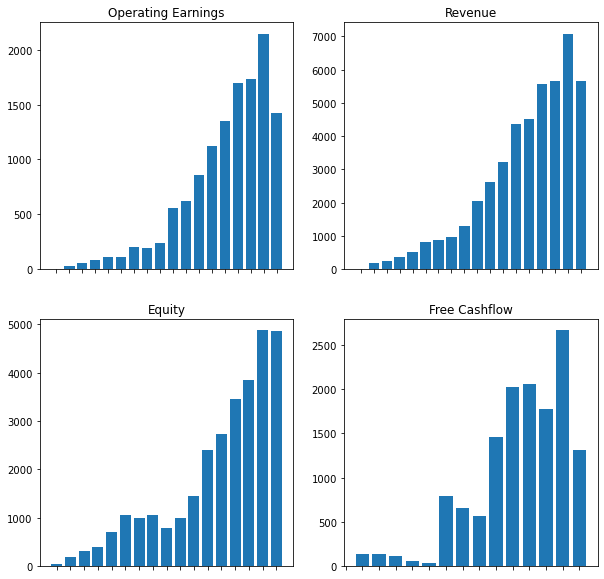

In [36]:
fig, (axs) = plt.subplots(2,2, figsize=(10,10))

axs[0,0].bar(x=x_axis, height='operationProfit', data=IncomeStatement)
axs[0,0].set_title('Operating Earnings')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(),rotation=45)
axs[0,1].set_title('Revenue')
axs[0,1].bar(x=x_axis, height='revenue', data=IncomeStatement)
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(),rotation=45)
axs[1,0].bar(x=BalanceSheet.index, height=BalanceSheet['equity'])
axs[1,0].set_title('Equity')
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(),rotation=45)
axs[1,1].bar(x=CashFlow.index, height=CashFlow['freeCashFlow'])
axs[1,1].set_title('Free Cashflow')
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(),rotation=45)

C:\Users\quang.ln1\AppData\Local\Temp/ipykernel_37212/1788130775.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(),rotation=45)
C:\Users\quang.ln1\AppData\Local\Temp/ipykernel_37212/1788130775.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(),rotation=45)
C:\Users\quang.ln1\AppData\Local\Temp/ipykernel_37212/1788130775.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(),rotation=45)
C:\Users\quang.ln1\AppData\Local\Temp/ipykernel_37212/1788130775.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(),rotation=45)


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, '')]

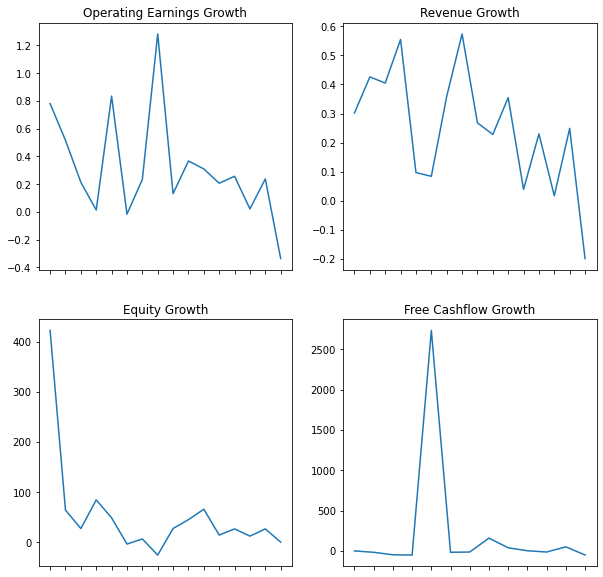

In [37]:
#The growth rate of the four numbers
fig, (axs) = plt.subplots(2,2, figsize=(10,10))

axs[0,0].plot(x_axis, 'yearOperationProfitGrowth', data=IncomeStatement)
axs[0,0].set_title('Operating Earnings Growth')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(),rotation=45)
axs[0,1].set_title('Revenue Growth')
axs[0,1].plot(x_axis, 'yearRevenueGrowth', data=IncomeStatement)
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(),rotation=45)
axs[1,0].plot(BalanceSheet.index, BalanceSheet['equityGrowth'])
axs[1,0].set_title('Equity Growth')
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(),rotation=45)
axs[1,1].plot(CashFlow.index, CashFlow['freeCashFlowRate'])
axs[1,1].set_title('Free Cashflow Growth')
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(),rotation=45)

Calculate the CAGR of the 4 numbers

In [38]:
#Merge multiple origin tables
full_df = pd.merge(IncomeStatement,BalanceSheet,left_index=True,right_index=True,how='left')
full_df = pd.merge(full_df,CashFlow,left_index=True,right_index=True,how='left')

#List of financial metrics to calculate the CAGR
metrics = ['operationProfit','equity','revenue','freeCashFlow']

#Calculate the CAGR for each metrics
CAGRS = {}

for metric in metrics:
    #Find the first and last non-null values:
    first_non_null = full_df[metric].loc[full_df[metric] > 0].first_valid_index()
    last_non_null = full_df[metric].last_valid_index()

    if first_non_null is not None and last_non_null is not None:
        #Calculate the number of years in which the value is not null
        num_years = int(last_non_null) - int(first_non_null) + 1
        initial_value = full_df[metric][first_non_null]
        lastest_value = full_df[metric][last_non_null]
        
        
        CAGR = (((lastest_value/initial_value) ** (1/num_years)) - 1) * 100

        #Store the CAGR and the num_years in the CAGRS dictionary
        CAGRS[metric] = {'cagr': CAGR, 'num_years': num_years}

#Print CAGR for each metric
for metric, values in CAGRS.items():
    cagr = values['cagr']
    num_years = values['num_years']
    print(f'CAGR of {metric}: {cagr: .2f}% over {num_years} years.')


# for metric in metrics:
#     initial_value = full_df[metric].dropna().loc[full_df[metric] > 0].iloc[0] #Find the first non null value
#     lastest_value = full_df[metric].iloc[-1]

#     lastest_year = int(full_df[metric].last_valid_index())
#     first_year = int(full_df[metric].first_valid_index())
#     print (f'{metric}: {first_year}, {lastest_year}')



CAGR of operationProfit:  24.78% over 17 years.
CAGR of equity:  33.68% over 17 years.
CAGR of revenue:  21.73% over 17 years.
CAGR of freeCashFlow:  17.56% over 14 years.


In [39]:
CAGR = (((1309/136) ** (1/14)) - 1) * 100
CAGR

17.55548832100797

<AxesSubplot:xlabel='index', ylabel='yearOperationProfitGrowth'>

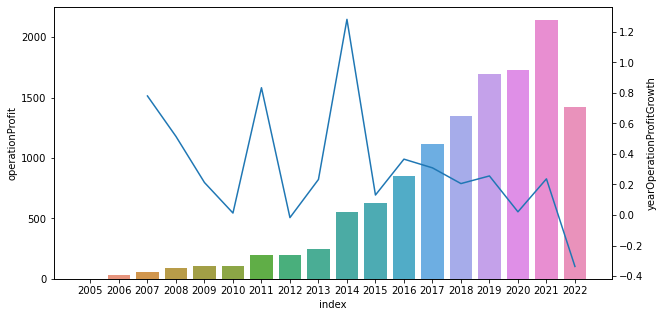

In [40]:
#Operating Earnings
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx() # Secondary y-axis

sns.barplot(x=x_axis, y='operationProfit', data=IncomeStatement, ax=ax1) # On primary ax1
sns.lineplot(x=x_axis, y='yearOperationProfitGrowth', data=IncomeStatement, ax=ax2) # On primary ax2

# plt.figure(figsize=(35,15))
# plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '2005'),
  Text(1, 0, '2006'),
  Text(2, 0, '2007'),
  Text(3, 0, '2008'),
  Text(4, 0, '2009'),
  Text(5, 0, '2010'),
  Text(6, 0, '2011'),
  Text(7, 0, '2012'),
  Text(8, 0, '2013'),
  Text(9, 0, '2014'),
  Text(10, 0, '2015'),
  Text(11, 0, '2016'),
  Text(12, 0, '2017'),
  Text(13, 0, '2018'),
  Text(14, 0, '2019'),
  Text(15, 0, '2020'),
  Text(16, 0, '2021'),
  Text(17, 0, '2022')])

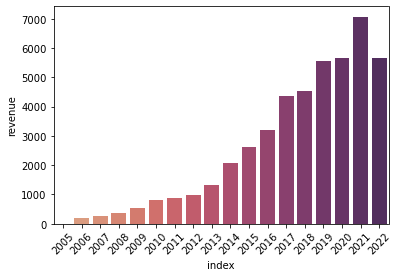

In [41]:
#Revenue
sns.barplot(x=IncomeStatement.index, y='revenue', data=IncomeStatement, palette='flare')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2006'),
  Text(1, 0, '2007'),
  Text(2, 0, '2008'),
  Text(3, 0, '2009'),
  Text(4, 0, '2010'),
  Text(5, 0, '2011'),
  Text(6, 0, '2012'),
  Text(7, 0, '2013'),
  Text(8, 0, '2014'),
  Text(9, 0, '2015'),
  Text(10, 0, '2016'),
  Text(11, 0, '2017'),
  Text(12, 0, '2018'),
  Text(13, 0, '2019'),
  Text(14, 0, '2020'),
  Text(15, 0, '2021'),
  Text(16, 0, '2022')])

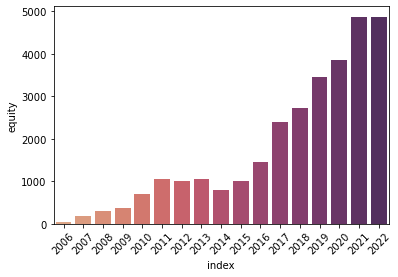

In [42]:
#Equity
# fig, ax1 = plt.subplots(figsize=(10,5))

sns.barplot(x=BalanceSheet.index, y='equity', data=BalanceSheet, palette='flare')
plt.xticks(rotation = 45)


In [43]:
DividendPaid = dividend_history('VCS')
DividendPaid.head(5)

,exerciseDate,cashYear,cashDividendPercentage,issueMethod
0,16/06/23,2023,0.2,cash
1,02/12/22,2022,0.3,cash
2,02/06/22,2022,0.3,cash
3,09/12/21,2021,0.2,cash
4,14/06/21,2021,0.2,cash


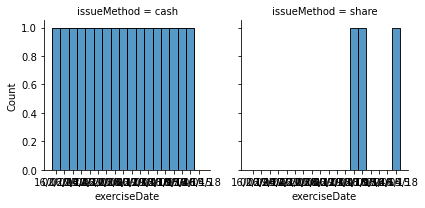

In [44]:
g = sns.FacetGrid(DividendPaid, col="issueMethod")
g.map(sns.histplot, "exerciseDate")

In [45]:
print(list(BalanceSheet.columns.values))

['ticker', 'shortAsset', 'cash', 'shortInvest', 'shortReceivable', 'inventory', 'longAsset', 'fixedAsset', 'asset', 'debt', 'shortDebt', 'longDebt', 'equity', 'capital', 'centralBankDeposit', 'otherBankDeposit', 'otherBankLoan', 'stockInvest', 'customerLoan', 'badLoan', 'provision', 'netCustomerLoan', 'otherAsset', 'otherBankCredit', 'oweOtherBank', 'oweCentralBank', 'valuablePaper', 'payableInterest', 'receivableInterest', 'deposit', 'otherDebt', 'fund', 'unDistributedIncome', 'minorShareHolderProfit', 'payable', 'equityGrowth']


In [46]:
IncomeStatement.head(5)

,ticker,revenue,yearRevenueGrowth,quarterRevenueGrowth,costOfGoodSold,grossProfit,operationExpense,operationProfit,yearOperationProfitGrowth,quarterOperationProfitGrowth,...,postTaxProfit,shareHolderIncome,yearShareHolderIncomeGrowth,quarterShareHolderIncomeGrowth,investProfit,serviceProfit,otherProfit,provisionExpense,operationIncome,ebitda
index,,,,,,,,,,,,,,,,,,,,,
2005,VCS,0,NaN,None,0,0,0,0,NaN,None,...,0,0,NaN,None,None,None,None,None,None,NaN
2006,VCS,200,NaN,None,-153,47,-14,33,NaN,None,...,6,6,NaN,None,None,None,None,None,None,NaN
2007,VCS,260,0.302,None,-185,75,-17,59,0.780,None,...,41,41,6.318,None,None,None,None,None,None,NaN
2008,VCS,371,0.426,None,-256,115,-26,89,0.515,None,...,75,75,0.818,None,None,None,None,None,None,132.0
2009,VCS,521,0.405,None,-375,146,-39,108,0.213,None,...,94,94,0.252,None,None,None,None,None,None,157.0


In [47]:
print(list(BalanceSheet.columns.values))

['ticker', 'shortAsset', 'cash', 'shortInvest', 'shortReceivable', 'inventory', 'longAsset', 'fixedAsset', 'asset', 'debt', 'shortDebt', 'longDebt', 'equity', 'capital', 'centralBankDeposit', 'otherBankDeposit', 'otherBankLoan', 'stockInvest', 'customerLoan', 'badLoan', 'provision', 'netCustomerLoan', 'otherAsset', 'otherBankCredit', 'oweOtherBank', 'oweCentralBank', 'valuablePaper', 'payableInterest', 'receivableInterest', 'deposit', 'otherDebt', 'fund', 'unDistributedIncome', 'minorShareHolderProfit', 'payable', 'equityGrowth']


### The Management Numbers
<ul>
    <li>ROE</li>
    <li>ROIC</li>
    <li>Debt</li>
</ul>


In [51]:
management_numbers_df = full_df[['operationProfit', 'equity','asset','debt']].dropna()

management_numbers_df['ROE'] = management_numbers_df['operationProfit'] / management_numbers_df['equity'] * 100

# Calculate ROIC
invested_capital = management_numbers_df['equity'] + management_numbers_df['debt']
management_numbers_df['ROIC'] = management_numbers_df['operationProfit'] / invested_capital * 100

#Calculate Debt-to-Equity Ratios
management_numbers_df['Debt_to_Equity'] = management_numbers_df['debt'] / management_numbers_df['equity'] * 100

management_numbers_df['ROE'] = management_numbers_df['ROE'].round(2)
management_numbers_df['ROIC'] = management_numbers_df['ROIC'].round(2)
management_numbers_df['Debt_to_Equity'] = management_numbers_df['Debt_to_Equity'].round(2)

print(management_numbers_df)

       operationProfit  equity   asset    debt    ROE   ROIC  Debt_to_Equity
index                                                                       
2006                33    35.0   384.0   348.0  94.29   8.62          994.29
2007                59   183.0   472.0   289.0  32.24  12.50          157.92
2008                89   300.0   594.0   277.0  29.67  15.42           92.33
2009               108   381.0   982.0   566.0  28.35  11.40          148.56
2010               109   702.0  1476.0   735.0  15.53   7.59          104.70
2011               200  1042.0  2698.0  1629.0  19.19   7.49          156.33
2012               197  1000.0  2648.0  1640.0  19.70   7.46          164.00
2013               243  1062.0  2767.0  1704.0  22.88   8.79          160.45
2014               554   786.0  2648.0  1862.0  70.48  20.92          236.90
2015               626   999.0  2781.0  1783.0  62.66  22.50          178.48
2016               855  1447.0  3338.0  1891.0  59.09  25.61          130.68

In [52]:
full_df.columns.values

array(['ticker_x', 'revenue', 'yearRevenueGrowth', 'quarterRevenueGrowth',
       'costOfGoodSold', 'grossProfit', 'operationExpense',
       'operationProfit', 'yearOperationProfitGrowth',
       'quarterOperationProfitGrowth', 'interestExpense', 'preTaxProfit',
       'postTaxProfit', 'shareHolderIncome',
       'yearShareHolderIncomeGrowth', 'quarterShareHolderIncomeGrowth',
       'investProfit', 'serviceProfit', 'otherProfit', 'provisionExpense',
       'operationIncome', 'ebitda', 'ticker_y', 'shortAsset', 'cash',
       'shortInvest', 'shortReceivable', 'inventory', 'longAsset',
       'fixedAsset', 'asset', 'debt', 'shortDebt', 'longDebt', 'equity',
       'capital', 'centralBankDeposit', 'otherBankDeposit',
       'otherBankLoan', 'stockInvest', 'customerLoan', 'badLoan',
       'provision', 'netCustomerLoan', 'otherAsset', 'otherBankCredit',
       'oweOtherBank', 'oweCentralBank', 'valuablePaper',
       'payableInterest', 'receivableInterest', 'deposit', 'otherDebt',
      

# Long Term Results
"In measuring **long term** economic performance - in contrast to yearly performance - we believe it is appropriate to **recognize** fully any realized capital gains or losses as well as extraordinary items, and also to utilize financial statements presenting equity securities **at market value**.  Such capital gains or losses, either realized or unrealized, are fully as important to shareholders over a period of years as earnings realized in a more routine manner through operations; it is just that their impact is often extremely capricious in the short run, a characteristic that makes them inappropriate as an indicator of single year managerial performance."  (BVPS)

-- Berkshire Letters 1979

In [57]:
company_overview('VCS')

,exchange,shortName,industryID,industryIDv2,industry,industryEn,establishedYear,noEmployees,noShareholders,foreignPercent,website,stockRating,deltaInWeek,deltaInMonth,deltaInYear,outstandingShare,issueShare,companyType,ticker
0,HNX,VICOSTONE,180,2353,Xây dựng và Vật liệu,Construction & Materials,2005,682,4721,0.029,http://www.vicostone.com,4.1,0.032,0.041,0.017,160.0,160.0,CT,VCS
